# Jupyter  shortcuts

up/down arrow keys to move, enter to edit

Esc to exit edit mode

Shift + enter to run code

1/2/3... to add comment

dd to delete cell

press h for more shortcuts

# Python Basic Syntax 

In [1]:
print("Hello Duckietown!")

Hello Duckietown!


In [2]:
x=1
print(x)

1


In [3]:
x=[1, 2, 3]
print(x)

[1, 2, 3]


In [4]:
for i in [1, 2, 3]:
    print(i)

1
2
3


In [5]:
x=0
if x==1 :
    print("x equals 1")
else : 
    print("x doesn't equal 1")

x doesn't equal 1


# Playing around with Numpy & Scipy  

## import lib

In [6]:
import numpy as np
import scipy as sp

## array declaration

In [7]:
x = np.array([1, 2, 3])
for i in range(x.shape[0]) :
    print x[i]
print x.shape, type(x), type(x[0])

1
2
3
(3,) <type 'numpy.ndarray'> <type 'numpy.int64'>


In [8]:
x = np.array([[1, 2, 3], [4, 5, 6]])
for i in range(x.shape[0]) :
    for j in range(x.shape[1]) :
        print x[i][j]
print x.shape, type(x), type(x[0]), type(x[0][0])

1
2
3
4
5
6
(2, 3) <type 'numpy.ndarray'> <type 'numpy.ndarray'> <type 'numpy.int64'>


In [9]:
x = np.zeros((3, 4))
print x

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [10]:
x = np.ones((3, 4))
print x

[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


In [11]:
x = np.arange(10, 30 ,5)
print x

[10 15 20 25]


## array manipulation

In [12]:
x = np.arange(15)
x = x.reshape(3,5)
print x

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


## visualization (matplotlib) 

In [13]:
from matplotlib import pyplot as plt

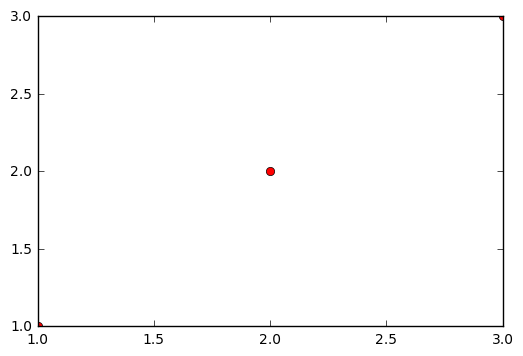

In [14]:
plt.plot([1,2,3], [1,2,3], 'ro')
#toggle axis
#plt.axis([0, 5, 0, 5])
plt.show()

In [15]:
x = np.arange(100).reshape(10,10)
print x

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


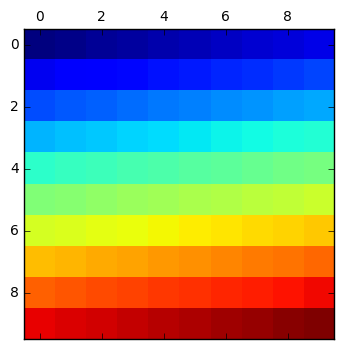

In [16]:
plt.matshow(x)
#toggle for gray colormap
#plt.matshow(x, cmap=plt.cm.gray)
plt.show()

## lets do some crazy stuff !

In [17]:
import numpy as np
a = np.zeros((100, 100))

In [18]:
l_mat = np.zeros((5, 5))
l_map = [(1, 2), (2, 2), (3, 2), (3, 3)]
for (i,j) in l_map :
    l_mat[i][j]=100

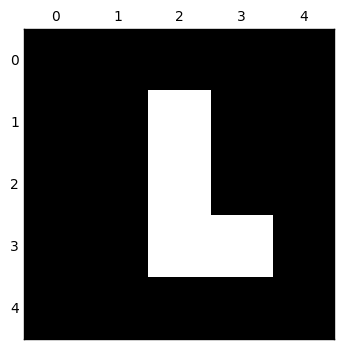

In [19]:
plt.matshow(l_mat, cmap=plt.cm.gray)
plt.show()

In [20]:
for i in range(30) :
    x = int(np.random.random()*94)
    y = int(np.random.random()*94)
    for p in range(l_mat.shape[0]) :
        for q in range(l_mat.shape[1]) :
            if(l_mat[p][q]!=0):
                a[x+p][y+q]=l_mat[p][q]
    

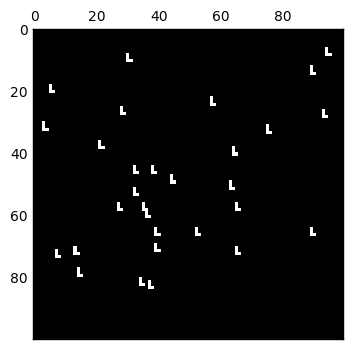

In [21]:
plt.matshow(a, cmap=plt.cm.gray)
plt.show()

## how to do detection? 

threshold mask 

In [22]:
threshold = np.zeros((100, 100))
for i in range(a.shape[0]) :
    for j in range(a.shape[1]) :
        if a[i][j] > 95 :
            threshold[i][j]=100

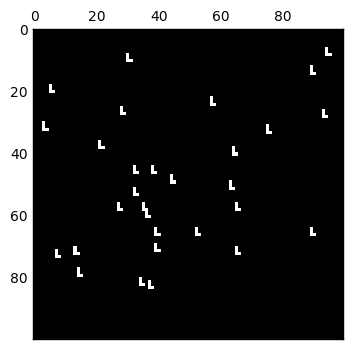

In [23]:
plt.matshow(threshold, cmap=plt.cm.gray)
plt.show()

convolution

In [24]:
from scipy import signal
conv = signal.convolve2d(a, l_mat)

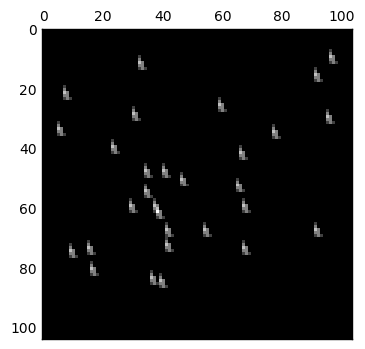

In [25]:
plt.matshow(conv, cmap=plt.cm.gray)
plt.show()

In [26]:
noise = np.random.random(10000).reshape(100,100)
noise *=100

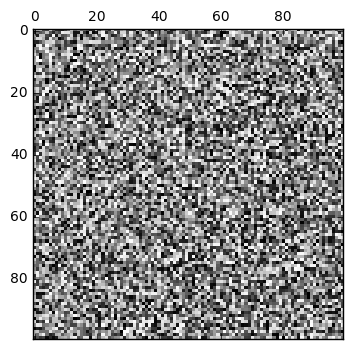

In [27]:
plt.matshow(noise, cmap=plt.cm.gray)
plt.show()

In [28]:
noise_a = np.add(noise,a)

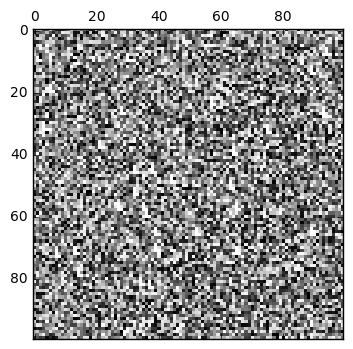

In [29]:
plt.matshow(noise_a, vmax=100, cmap=plt.cm.gray)
plt.show()

threshold

In [30]:
threshold = np.zeros((100, 100))
for i in range(noise_a.shape[0]) :
    for j in range(noise_a.shape[1]) :
        if noise_a[i][j] > 98 :
            threshold[i][j]=100

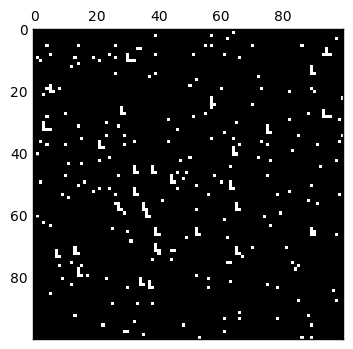

In [31]:
plt.matshow(threshold, vmax=100, cmap=plt.cm.gray)
plt.show()

convolution  

In [32]:
conv = signal.convolve2d(noise_a, l_mat)
conv /= conv.max()
threshold = np.zeros((100, 100))
for i in range(100) :
    for j in range(100) :
        if conv[i][j] > 0.65 :
            threshold[i][j]=100

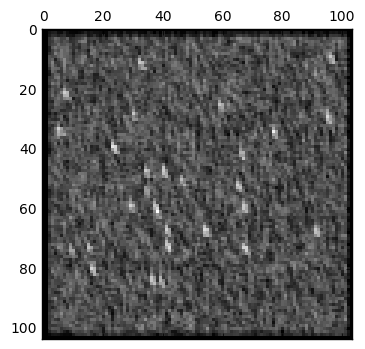

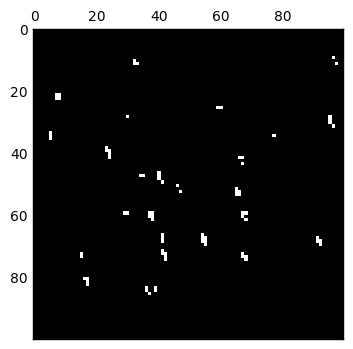

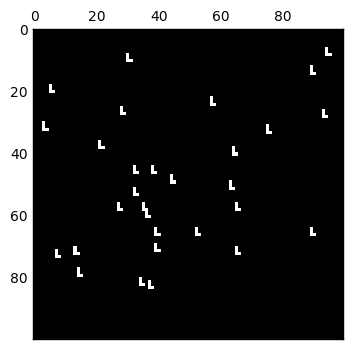

In [33]:
plt.matshow(conv, cmap=plt.cm.gray)
plt.matshow(threshold, cmap=plt.cm.gray)
plt.matshow(a, cmap=plt.cm.gray)
plt.show()

## gaussian filter

In [34]:
from scipy.ndimage.filters import gaussian_filter
gauss = np.zeros((100,100))
gaussian_filter(a, 2, output = gauss)

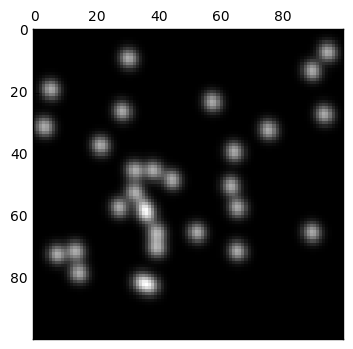

In [35]:
plt.matshow(gauss, cmap=plt.cm.gray)
plt.show()

## Let's use it to do our math homework! 

### Calculus 

In [36]:
from scipy import integrate

In [37]:
def f(x) :
    return x**2
result, err = integrate.quad(f, 0, 1)
print result

0.333333333333


### Linear Algebra 

In [38]:
from scipy import linalg

In [39]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [40]:
print A
print A.dot(linalg.inv(A))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[  2.   0.   2.]
 [  8.   0.   0.]
 [ 16.   0.   8.]]


In [41]:
B = linalg.inv(A)
print B

[[ -4.50359963e+15   9.00719925e+15  -4.50359963e+15]
 [  9.00719925e+15  -1.80143985e+16   9.00719925e+15]
 [ -4.50359963e+15   9.00719925e+15  -4.50359963e+15]]


In [42]:
print A*B

[[ -4.50359963e+15   1.80143985e+16  -1.35107989e+16]
 [  3.60287970e+16  -9.00719925e+16   5.40431955e+16]
 [ -3.15251974e+16   7.20575940e+16  -4.05323966e+16]]


In [43]:
import numpy as np
np.mgrid[0:5,0:5]

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

# numpy meshgrid 

In [44]:
import numpy as np

In [45]:
nx, ny = (3,2)

In [46]:
x = np.linspace(0, 1, nx)

In [47]:
x

array([ 0. ,  0.5,  1. ])

In [48]:
y = np.linspace(0, 1, ny)

In [49]:
y

array([ 0.,  1.])

In [50]:
xv, yv = np.meshgrid(x, y)

In [51]:
xv

array([[ 0. ,  0.5,  1. ],
       [ 0. ,  0.5,  1. ]])

In [52]:
yv

array([[ 0.,  0.,  0.],
       [ 1.,  1.,  1.]])

## example for function evaluation 

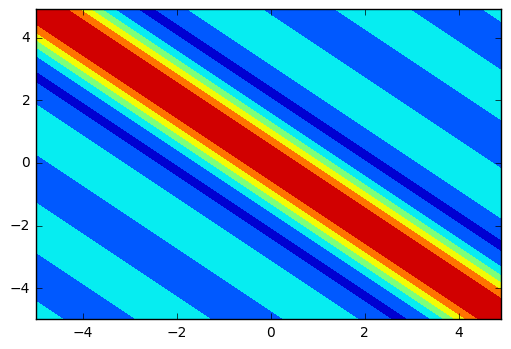

In [9]:
import matplotlib.pyplot as plt
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse = True)
z = np.sin(xx*2+yy*2)/(xx*2+yy*2)
h = plt.contourf(x, y, z)
plt.show()

In [54]:
np.linspace(0,5,10)

array([ 0.        ,  0.55555556,  1.11111111,  1.66666667,  2.22222222,
        2.77777778,  3.33333333,  3.88888889,  4.44444444,  5.        ])

In [55]:
np.arange(0,5,0.5)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

# numpy linalg

In [56]:
a = np.arange(-4, 5, 1)

In [57]:
a

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [58]:
b = a.reshape((3,3))

In [59]:
b

array([[-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4]])

In [60]:
np.linalg.norm(a)

7.745966692414834

In [61]:
np.linalg.norm(b)

7.745966692414834

## unravel_index

### return value is row and col

In [62]:
np.unravel_index([1,2,3,4],(4,4))

(array([0, 0, 0, 1]), array([1, 2, 3, 0]))

In [63]:
np.unravel_index([1,2,3,4],(4,2))

(array([0, 1, 1, 2]), array([1, 0, 1, 0]))

# Playing with opencv

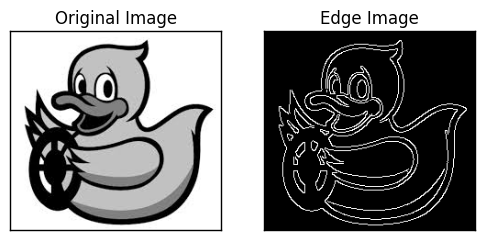

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('duckietown.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

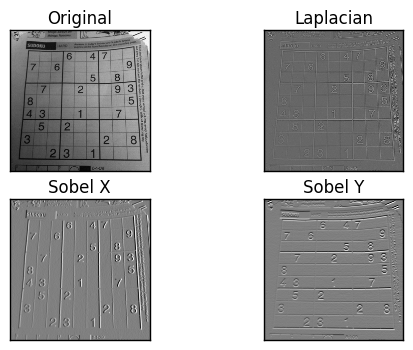

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sudoku.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
 
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()